In [1]:
import matplotlib.pyplot as plt
from collections import Counter
from linear_algebra import distance
import re
import numpy

In [2]:
cities = [([-122.3 , 47.53], "Python"), #Seattle
          ([-96.85, 32.85], "Java"), #Austin
          ([ -89.33, 43.13], "R"), #Madison
         ]

In [3]:
#mechanizm liczenia głosów
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner
#określenie zwycięzcy
def majority_vote(labels):
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     
    else:
        return majority_vote(labels[:-1])


def knn_classify(k, labeled_points, new_point):
    by_distance = sorted(labeled_points, 
                         key=lambda point: distance(point[0], new_point))

    k_nearest_labels = [label for _, label in by_distance[:k]]

    return majority_vote(k_nearest_labels)


segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

def plot_state_borders(plt, color='0.0'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)

In [4]:
plots = { "Java" : ([], []), "Python": ([],[]), "R" : ([],[])}

markers = {"Java" : "o", "Python" : "s", "R" : "^"}
colors = {"Java" : "r", "Python" : "b", "R" : "g"}

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

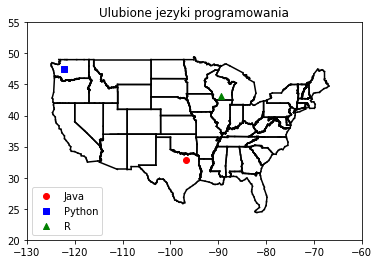

In [5]:
for language, (x,y) in plots.items():
    plt.scatter(x,y, color=colors[language], marker = markers[language],
               label = language, zorder=10)
    
plot_state_borders(plt)

plt.legend(loc=0)
plt.axis([-130,-60,20,55])
plt.title("Ulubione jezyki programowania")
plt.show()

In [33]:
for k in [1, 3, 5, 7]:
    num_correct = 0
    
    for city in cities:
        location, actual_language = city
        other_cities = [other_city
                      for other_city in cities
                      if other_city != city]
        predicted_language = knn_classify(k, other_cities, location)
        
        if predicted_language == actual_language:
            num_correct +=1
        
    print(k, "sąsiad(ów):", num_correct, "poprawnie na", len(cities))
    

1 sąsiad(ów): 0 poprawnie na 3
3 sąsiad(ów): 0 poprawnie na 3
5 sąsiad(ów): 0 poprawnie na 3
7 sąsiad(ów): 0 poprawnie na 3


In [34]:
plots = { "Java" : ([], []), "Python": ([],[]), "R" : ([],[])}

In [41]:
def renderMap(k):
    for longitude in range(-130, -60):
        for latitude in range(20,55):
            predicted_language = knn_classify(k, cities, [longitude, latitude])
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    for language, (x,y) in plots.items():
        plt.scatter(x,y, color=colors[language], marker = markers[language],
                   label = language, zorder=0)

    plot_state_borders(plt)

    plt.legend(loc=0)
    plt.axis([-130,-60,20,55])
    plt.title("k = " + str(k))
    plt.show()

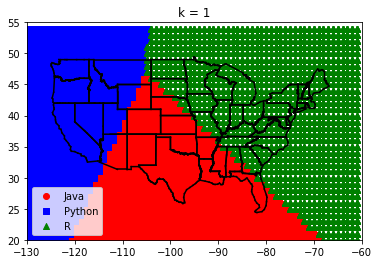

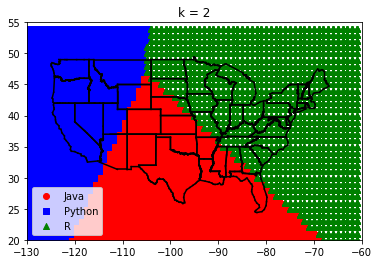

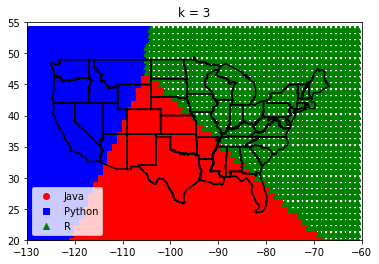

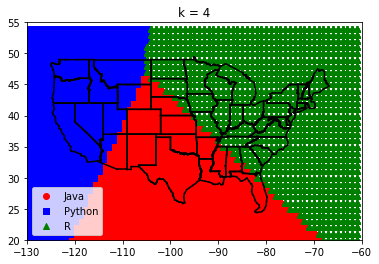

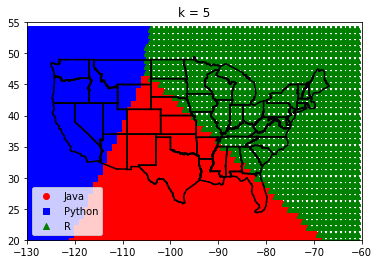

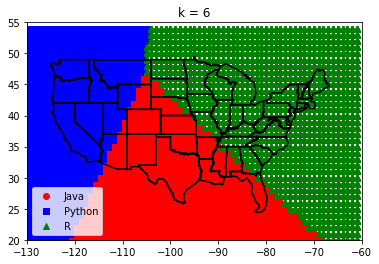

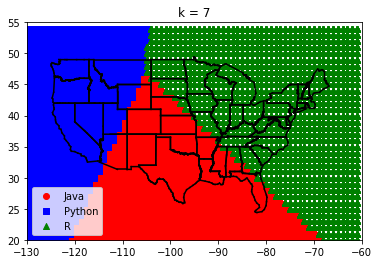

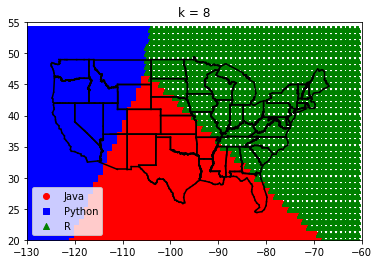

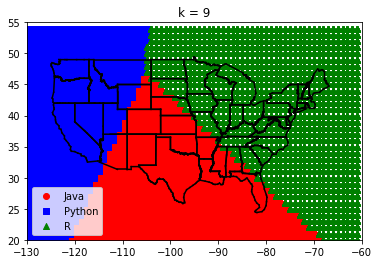

In [43]:
renderMap(1)
renderMap(2)
renderMap(3)
renderMap(4)
renderMap(5)
renderMap(6)
renderMap(7)
renderMap(8)
renderMap(9)